In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('/content/Bank Customer Churn Prediction.csv')
data.head(10)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,15574012,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,15592531,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,15656148,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,15792365,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,15592389,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:

data.rename(columns={'customer_id': 'Account Number'}, inplace=True)

In [4]:
data.head()

,Account Number,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Account Number    10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


In [6]:
data.describe()

,Account Number,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [7]:
data.shape

(10000, 12)

In [8]:
data.isnull().sum()

,0
Account Number,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


In [9]:
data.nunique()

,0
Account Number,10000
credit_score,460
country,3
gender,2
age,70
tenure,11
balance,6382
products_number,4
credit_card,2
active_member,2


In [10]:
print(data['country'].value_counts())
print(data['gender'].value_counts())
print(data['credit_card'].value_counts())
print(data['age'].value_counts())

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64
gender
Male      5457
Female    4543
Name: count, dtype: int64
credit_card
1    7055
0    2945
Name: count, dtype: int64
age
37    478
38    477
35    474
36    456
34    447
     ... 
92      2
82      1
88      1
85      1
83      1
Name: count, Length: 70, dtype: int64


In [11]:
age_counts = data['age'].value_counts().reset_index()
age_counts.columns = ['age', 'count']
age_counts = age_counts.sort_values('age')
print(age_counts)

    age  count
49   18     22
48   19     27
43   20     40
40   21     53
30   22     84
..  ...    ...
69   83      1
64   84      2
68   85      1
67   88      1
65   92      2

[70 rows x 2 columns]


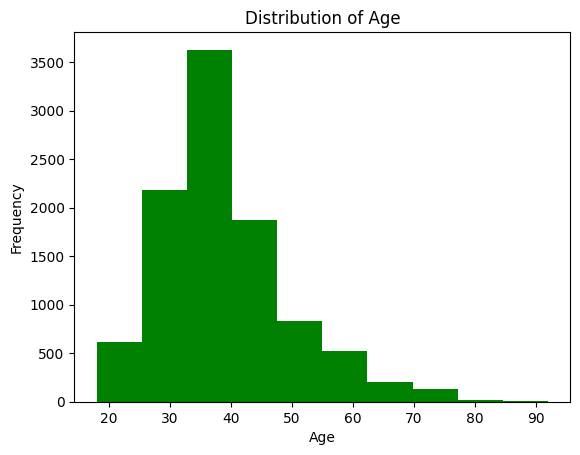

In [12]:
plt.hist(data['age'], facecolor='g' ,bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Age')
plt.show()

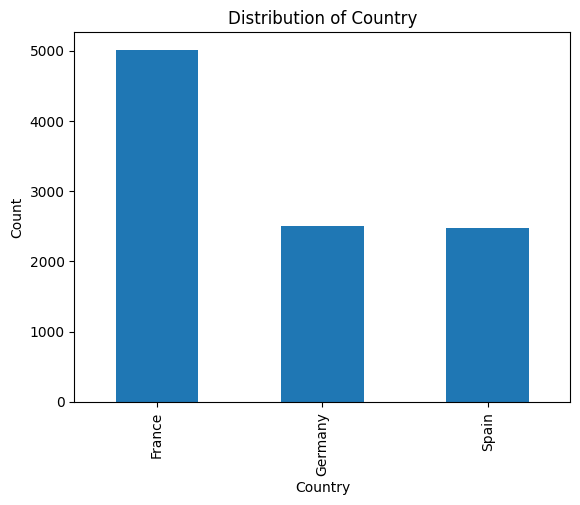

In [13]:
data['country'].value_counts().plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Distribution of Country')
plt.show()

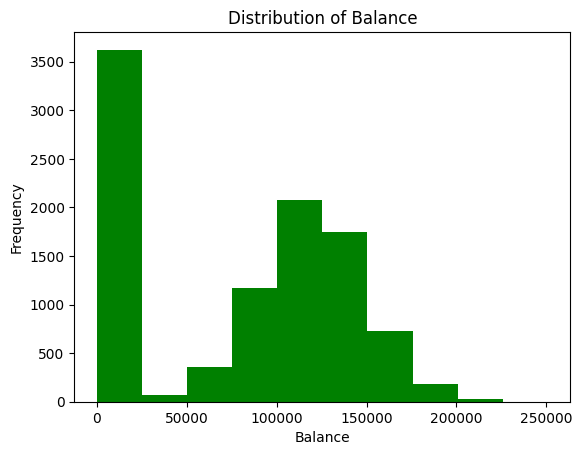

In [ ]:
plt.hist(data['balance'], facecolor='g', bins=10)
plt.xlabel('Balance')
plt.ylabel('Frequency')
plt.title('Distribution of Balance')
plt.show()

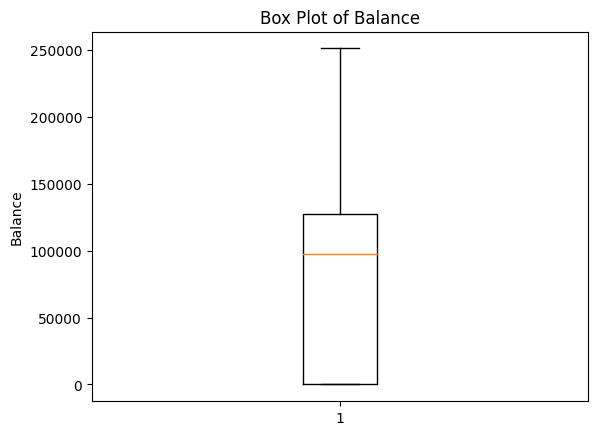

In [ ]:
plt.boxplot(data['balance'])
plt.ylabel('Balance')
plt.title('Box Plot of Balance')
plt.show()

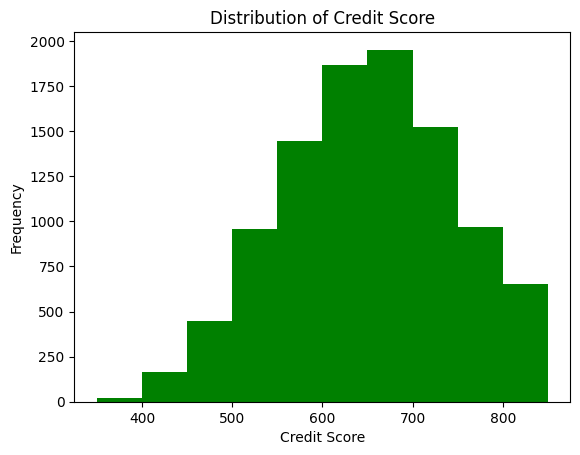

In [ ]:
plt.hist(data['credit_score'], facecolor='g', bins=10)
plt.xlabel('Credit Score')
plt.ylabel('Frequency')
plt.title('Distribution of Credit Score')
plt.show()

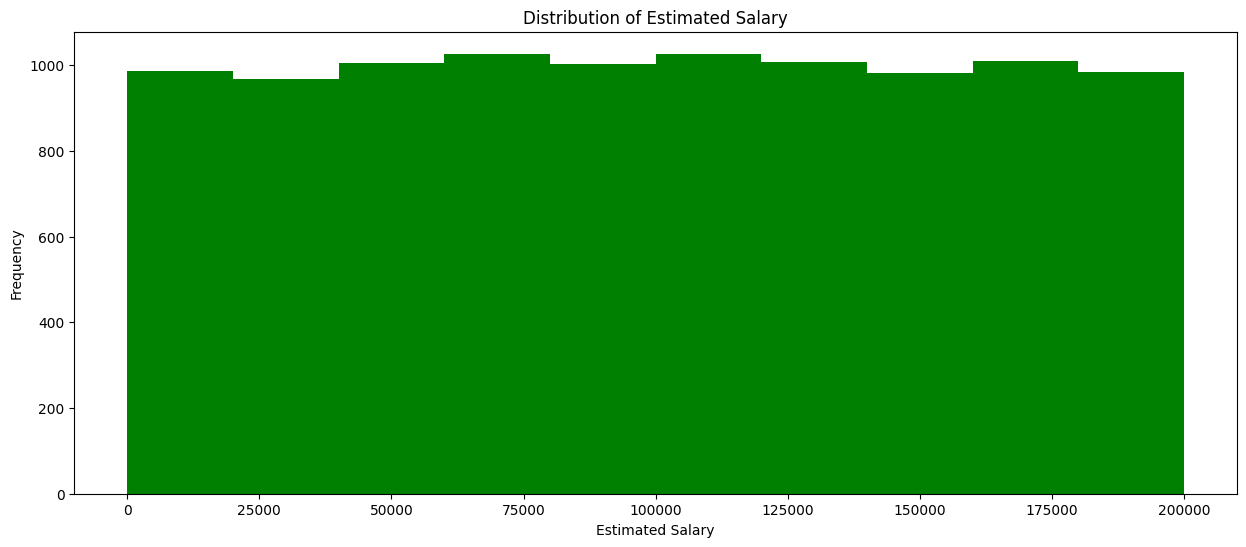

In [ ]:
figure = plt.figure(figsize=(15, 6))
plt.hist(data['estimated_salary'], facecolor = 'g', bins = 10)
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.title('Distribution of Estimated Salary')
plt.show()

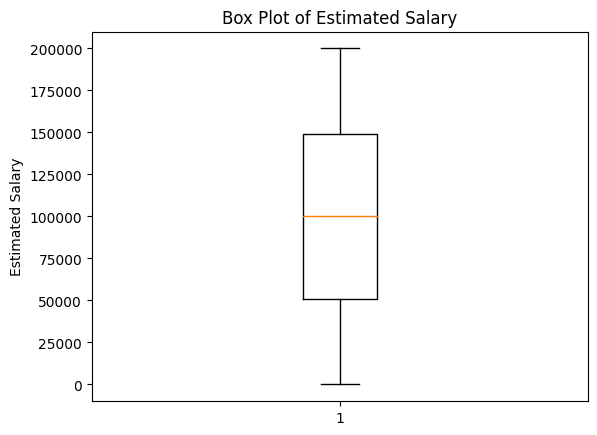

In [ ]:
plt.boxplot(data['estimated_salary'])
plt.ylabel('Estimated Salary')
plt.title('Box Plot of Estimated Salary')
plt.show()

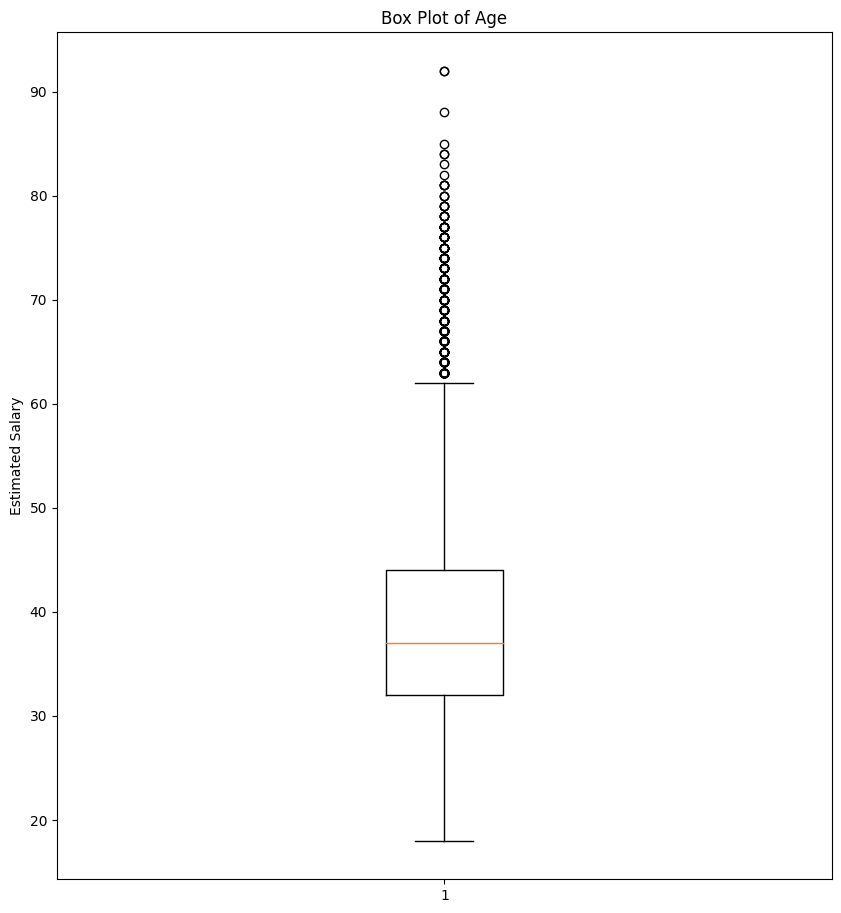

In [ ]:
figure = plt.figure(figsize=(10,11))
plt.boxplot(data['age'])
plt.ylabel('Estimated Salary')
plt.title('Box Plot of Age')
plt.show()

In [ ]:
import pandas as pd

# Identify the column you want to check for outliers (e.g., 'cretid_chart')
column = 'age'

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = data[column].quantile(0.25)
Q3 = data[column].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define outliers as points outside of [Q1 - 1.5*IQR, Q3 + 1.5*IQR]
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Find the outliers
outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]

# Count the number of outliers
num_outliers = outliers.shape[0]

# Print the number of outliers
print(f'Number of outliers in {column}: {num_outliers}')

Number of outliers in age: 359


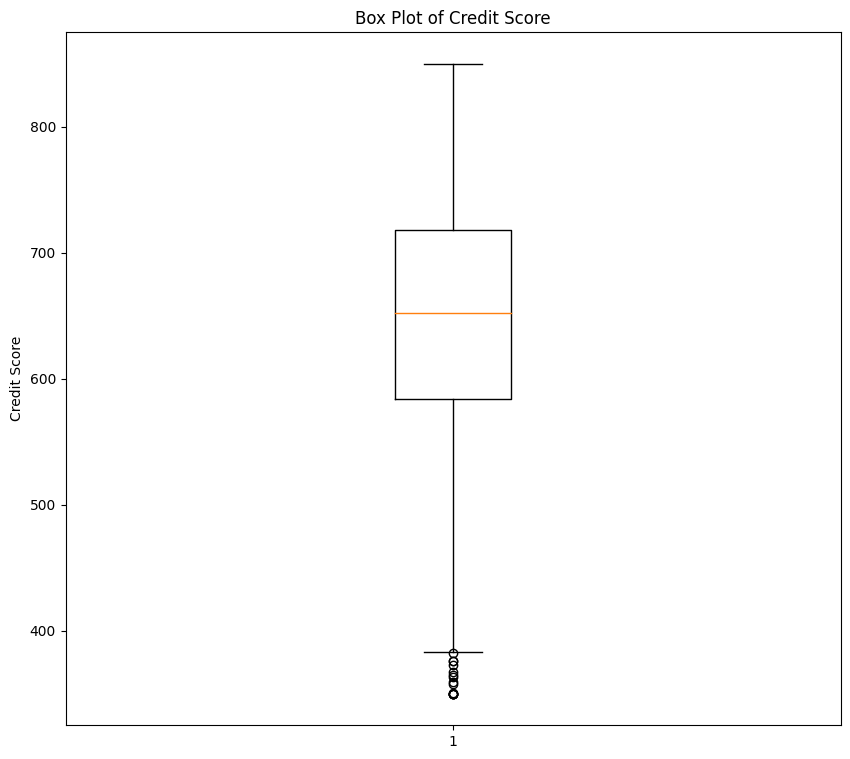

In [ ]:
figure = plt.figure(figsize=(10,9))
plt.boxplot(data['credit_score'])
plt.ylabel('Credit Score')
plt.title('Box Plot of Credit Score')
plt.show()

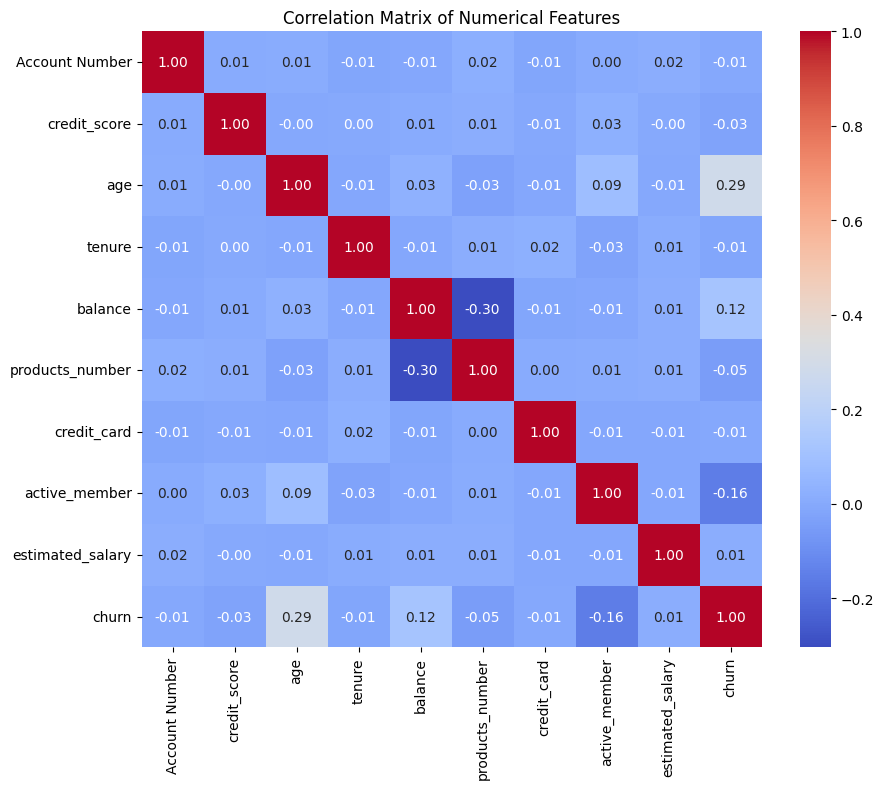

In [ ]:
correlation_matrix = data.select_dtypes(include=['number']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [ ]:
churned_customers = data['churn'][data['churn'] == 1].count()
total_customers = data['churn'].count()
churn_rate = (churned_customers / total_customers) * 100
print(f"The overall churn rate is: {churn_rate:.2f}%")


The overall churn rate is: 20.37%


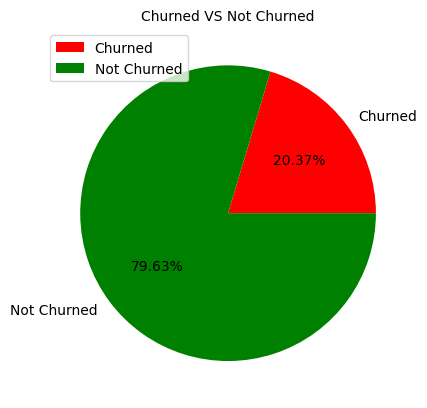

In [ ]:
sizes = [data.churn[data['churn']==1].count(), data.churn[data['churn']==0].count()]
labels = ['Churned', 'Not Churned']
colors = ['red', 'Green']

plt.pie(sizes, labels=labels, autopct='%.2f%%', colors=colors)
plt.legend(loc='upper left')
plt.title("Churned VS Not Churned", size=10)
plt.show()

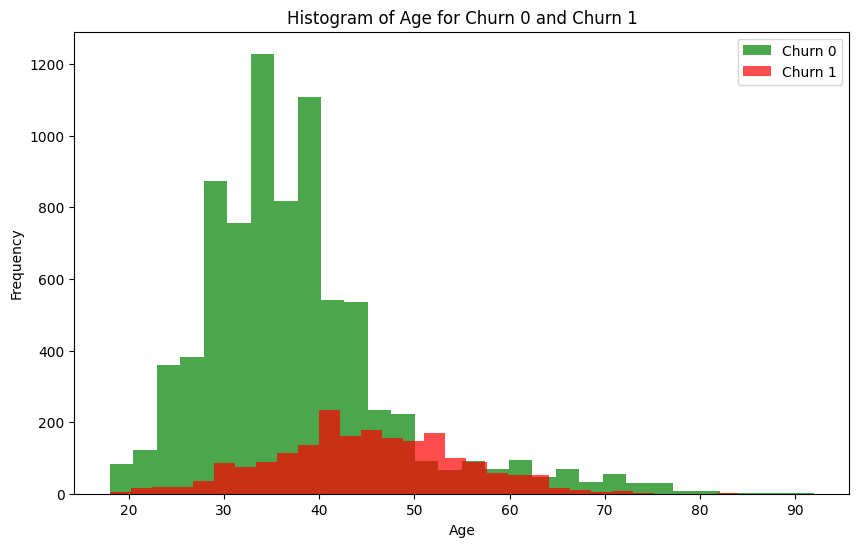

In [ ]:
churn_0_age = data[data["churn"] == 0]["age"]
churn_1_age = data[data["churn"] == 1]["age"]
plt.figure(figsize=(10, 6))
plt.hist(churn_0_age, bins=30, alpha=0.7, color="Green", label="Churn 0")
plt.hist(churn_1_age, bins=30, alpha=0.7, color="Red", label="Churn 1")

plt.xlabel("Age")
plt.ylabel("Frequency")
plt.title("Histogram of Age for Churn 0 and Churn 1")
plt.legend()
plt.show()

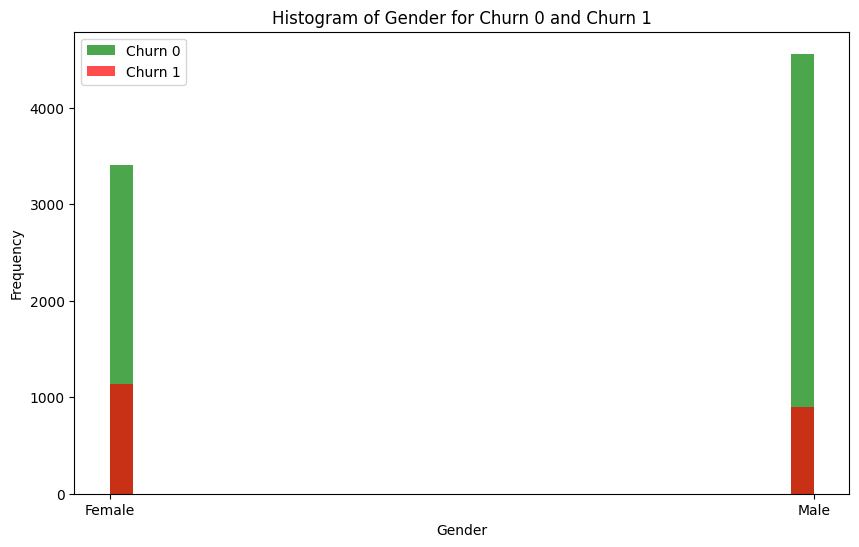

In [ ]:
churn_0_age = data[data["churn"] == 0]["gender"]
churn_1_age = data[data["churn"] == 1]["gender"]
plt.figure(figsize=(10, 6))
plt.hist(churn_0_age, bins=30, alpha=0.7, color="Green", label="Churn 0")
plt.hist(churn_1_age, bins=30, alpha=0.7, color="Red", label="Churn 1")

plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.title("Histogram of Gender for Churn 0 and Churn 1")
plt.legend()
plt.show()

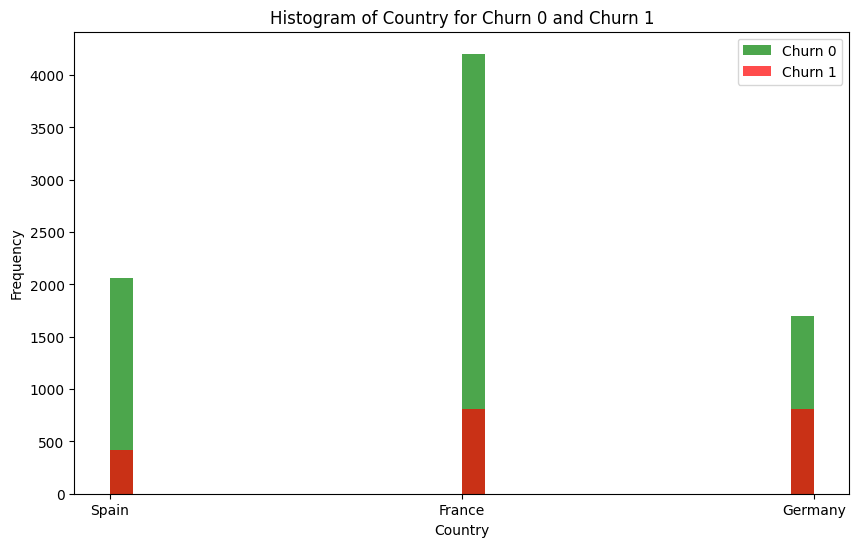

In [ ]:
churn_0_age = data[data["churn"] == 0]["country"]
churn_1_age = data[data["churn"] == 1]["country"]
plt.figure(figsize=(10, 6))
plt.hist(churn_0_age, bins=30, alpha=0.7, color="Green", label="Churn 0")
plt.hist(churn_1_age, bins=30, alpha=0.7, color="Red", label="Churn 1")

plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Histogram of Country for Churn 0 and Churn 1")
plt.legend()
plt.show()

**Median** **values**

In [ ]:
data.groupby('churn')['age'].mean()

,age
churn,
0,37.408389
1,44.837997


In [ ]:
pd.crosstab(data['country'], data['churn'])

churn,0,1
country,,
France,4204,810
Germany,1695,814
Spain,2064,413


**churn rates for each product number**

In [ ]:
for i in range(1, data['products_number'].max() + 1):
        churn_rate = data[data['products_number'] == i]['churn'].mean() * 100
        print(f"Churn rate for {i} products: {churn_rate:.2f}%")

Churn rate for 1 products: 27.71%
Churn rate for 2 products: 7.58%
Churn rate for 3 products: 82.71%
Churn rate for 4 products: 100.00%


In [ ]:
from scipy.stats import chi2_contingency

# Create a contingency table
contingency_table = pd.crosstab(data['products_number'], data['churn'])

# Perform the chi-squared test
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Print the results
print(f"Chi-squared statistic: {chi2:.2f}")
print(f"P-value: {p:.3f}")

# Interpret the results
if p < 0.05:
    print("There is a statistically significant association between the number of products and churn.")
else:
    print("There is no statistically significant association between the number of products and churn.")

Chi-squared statistic: 1503.63
P-value: 0.000
There is a statistically significant association between the number of products and churn.


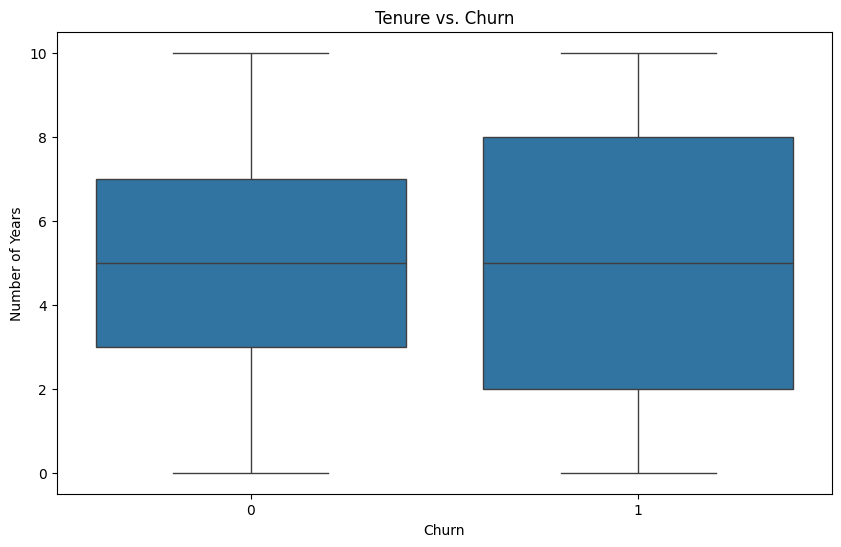

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tenure', data=data)
plt.title('Tenure vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Number of Years')
plt.show()

In [ ]:
correlation = data['tenure'].corr(data['churn'])
print(f"Correlation Tenure and Churn: {correlation:.2f}")

Correlation Tenure and Churn: -0.01


**The Average Tenure for churned and non churned customers**

In [ ]:
data.groupby('churn')['tenure'].mean()

,tenure
churn,
0,5.033279
1,4.932744


<Axes: xlabel='credit_card'>

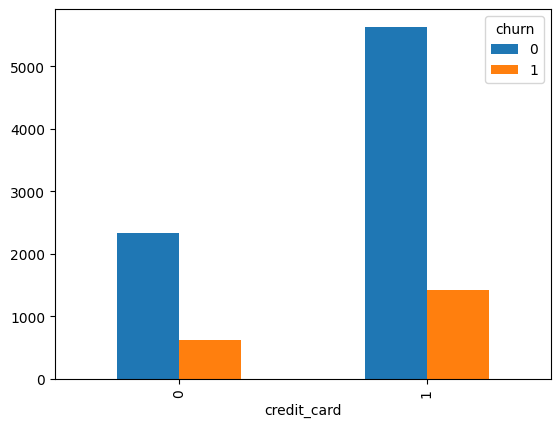

In [ ]:
data.groupby(['credit_card', 'churn']).churn.count().unstack().plot(kind='bar')

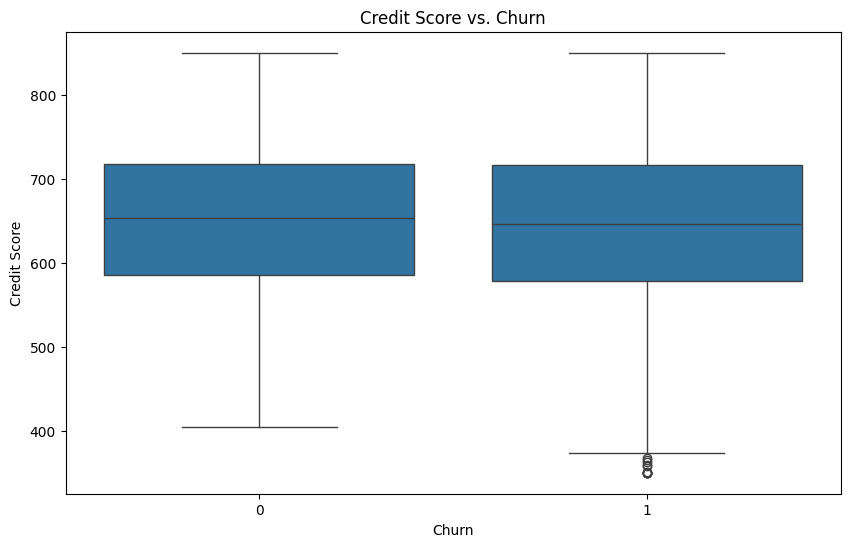

              credit_score     churn
credit_score      1.000000 -0.027094
churn            -0.027094  1.000000


In [ ]:
# prompt: Credit Score and Churn
# How does a customer’s credit score relate to their likelihood of churning?

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='credit_score', data=data)
plt.title('Credit Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()
correlation_matrix = data[['credit_score', 'churn']].corr()
print(correlation_matrix)



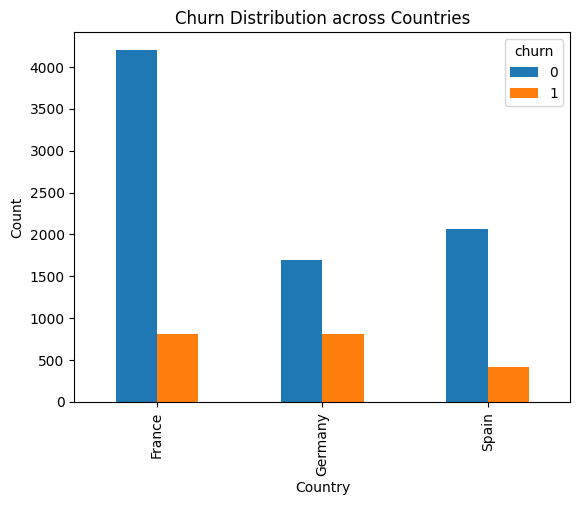

In [ ]:
pd.crosstab(data['country'], data['churn']).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn Distribution across Countries')
plt.show()

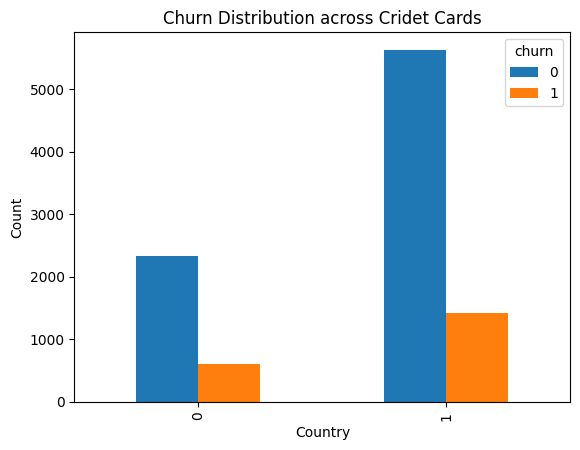

In [ ]:
pd.crosstab(data['credit_card'], data['churn']).plot(kind='bar')
plt.xlabel('Country')
plt.ylabel('Count')
plt.title('Churn Distribution across Cridet Cards')
plt.show()

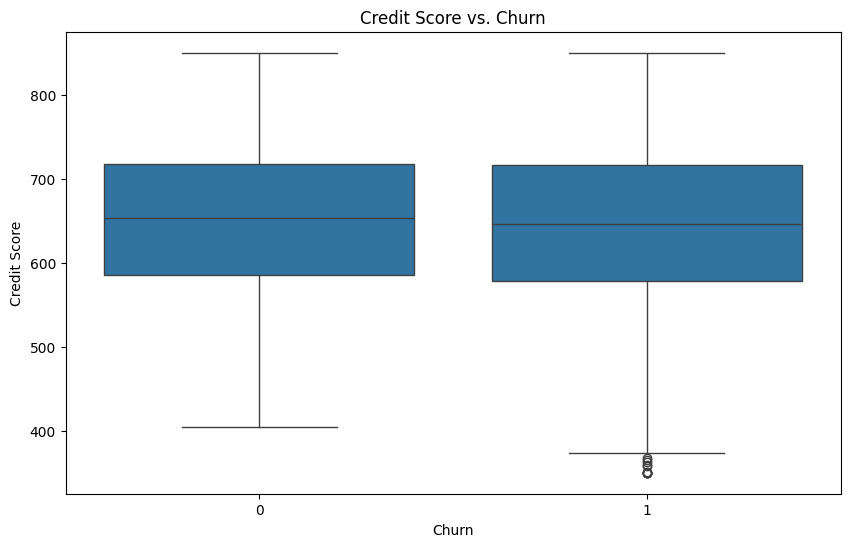

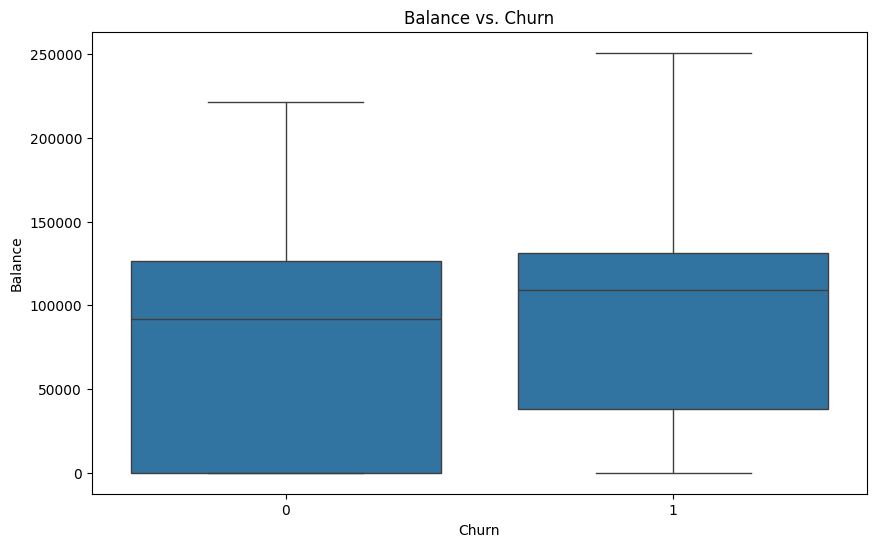

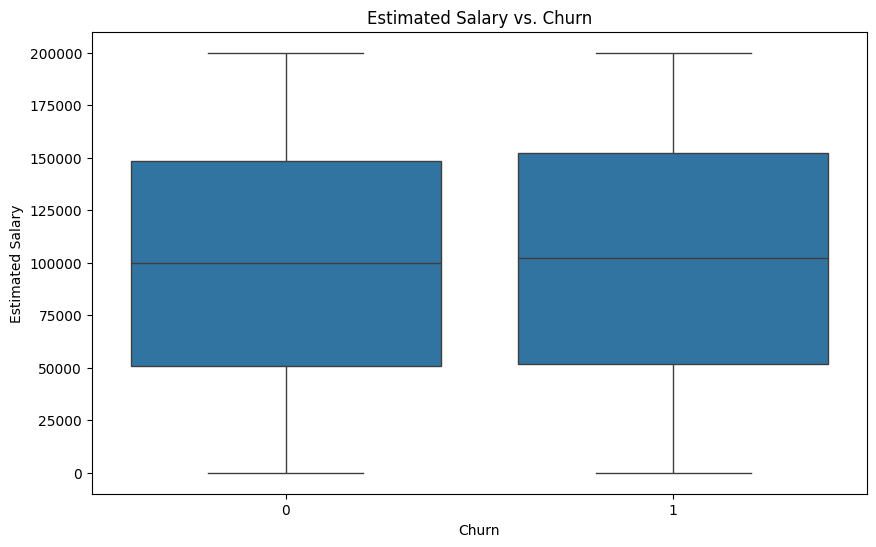

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='credit_score', data=data)
plt.title('Credit Score vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Credit Score')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='balance', data=data)
plt.title('Balance vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='estimated_salary', data=data)
plt.title('Estimated Salary vs. Churn')
plt.xlabel('Churn')
plt.ylabel('Estimated Salary')
plt.show()

**Analyze distributions of categorical features**

country
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64


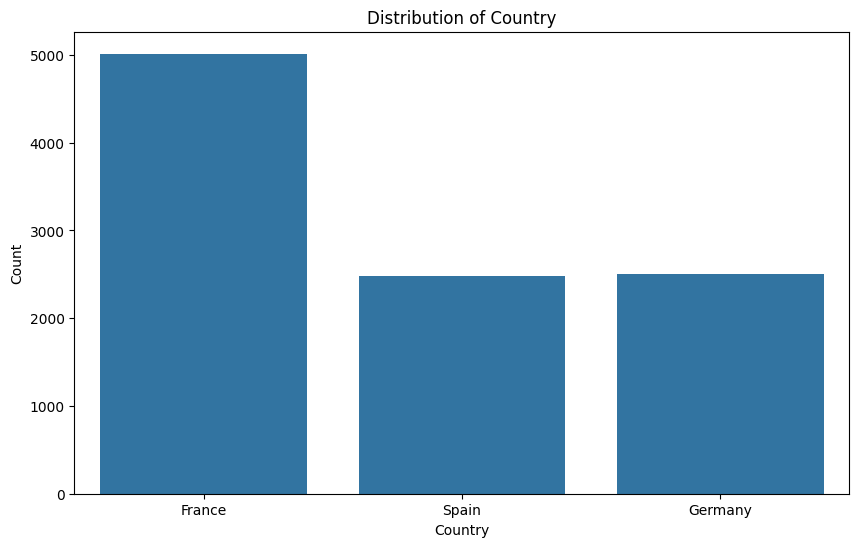

gender
Male      5457
Female    4543
Name: count, dtype: int64


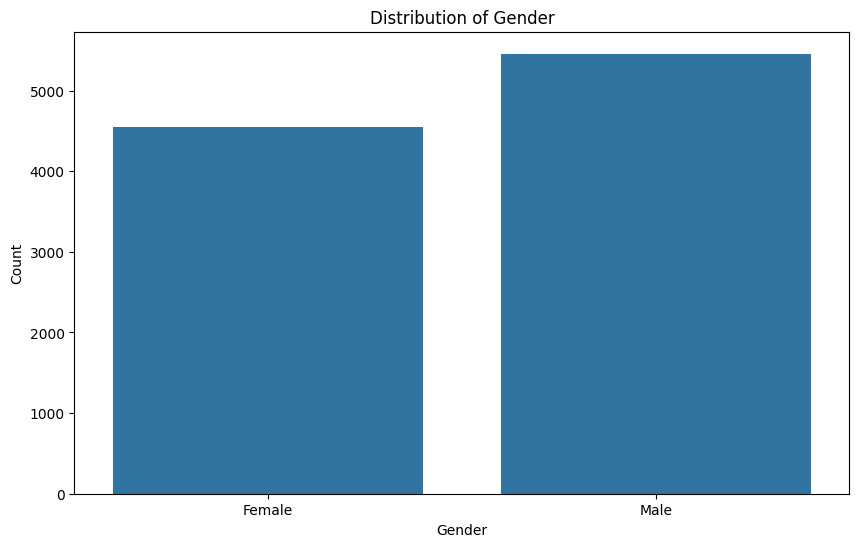

credit_card
1    7055
0    2945
Name: count, dtype: int64


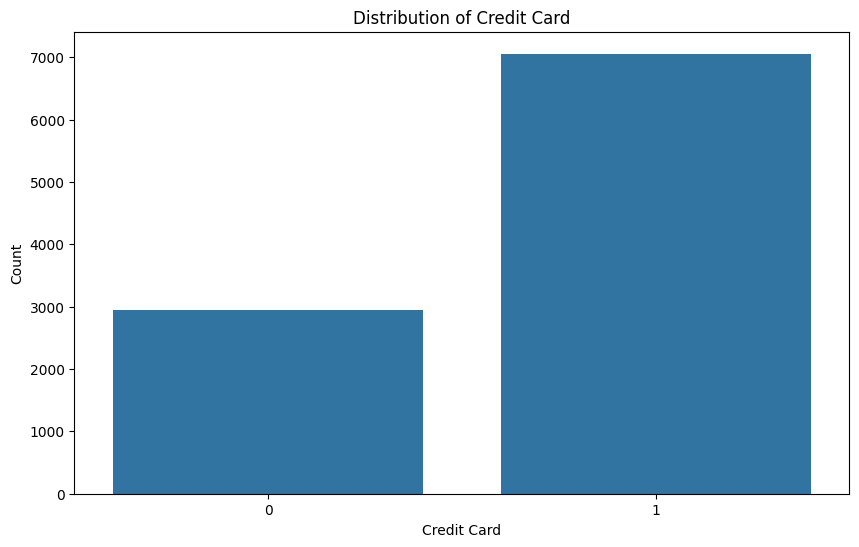

In [ ]:
# Country
print(data['country'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='country', data=data)
plt.title('Distribution of Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.show()

# Gender
print(data['gender'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='gender', data=data)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

# Credit Card
print(data['credit_card'].value_counts())
plt.figure(figsize=(10, 6))
sns.countplot(x='credit_card', data=data)
plt.title('Distribution of Credit Card')
plt.xlabel('Credit Card')
plt.ylabel('Count')
plt.show()

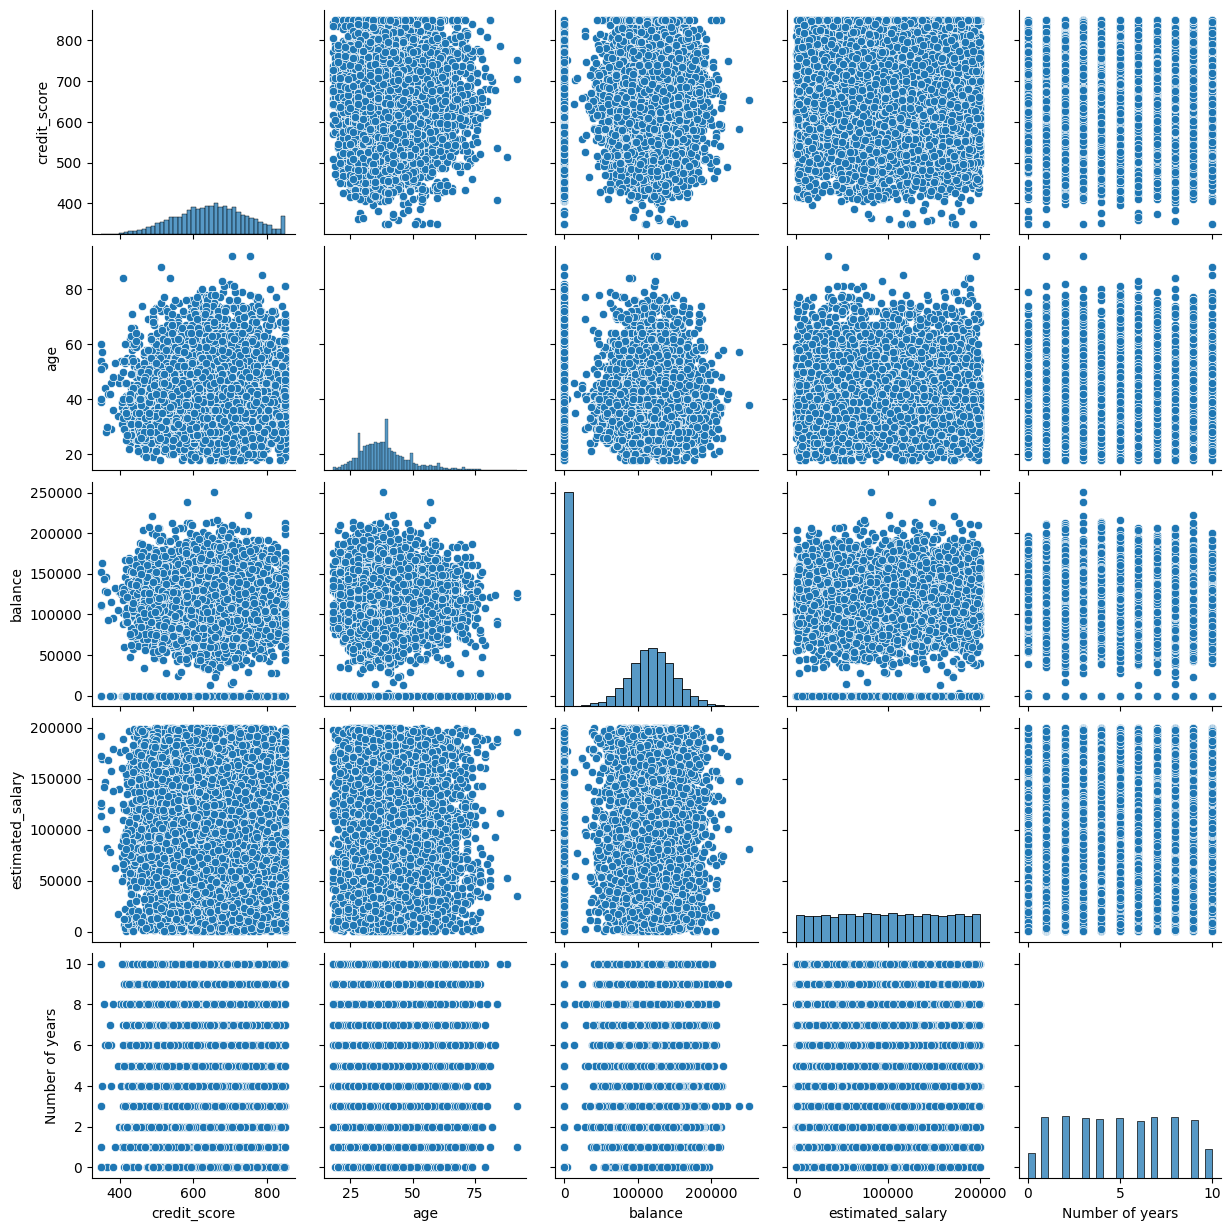

In [ ]:
numerical_features = ['credit_score', 'age', 'balance', 'estimated_salary', 'Number of years']
sns.pairplot(data[numerical_features])
plt.show()

Churn rate for high-value customers: 23.71%


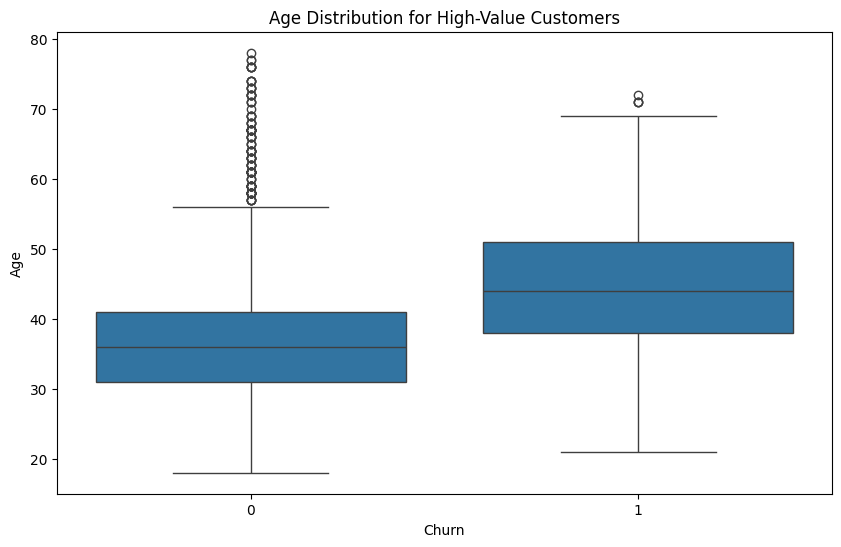

gender
Female    29.237668
Male      19.264069
Name: churn, dtype: float64
country
France     20.340587
Germany    29.025424
Spain      20.800000
Name: churn, dtype: float64
Correlation between credit score and churn for high-value customers: -0.01
products_number
1     25.364964
2     12.062257
3     95.454545
4    100.000000
Name: churn, dtype: float64


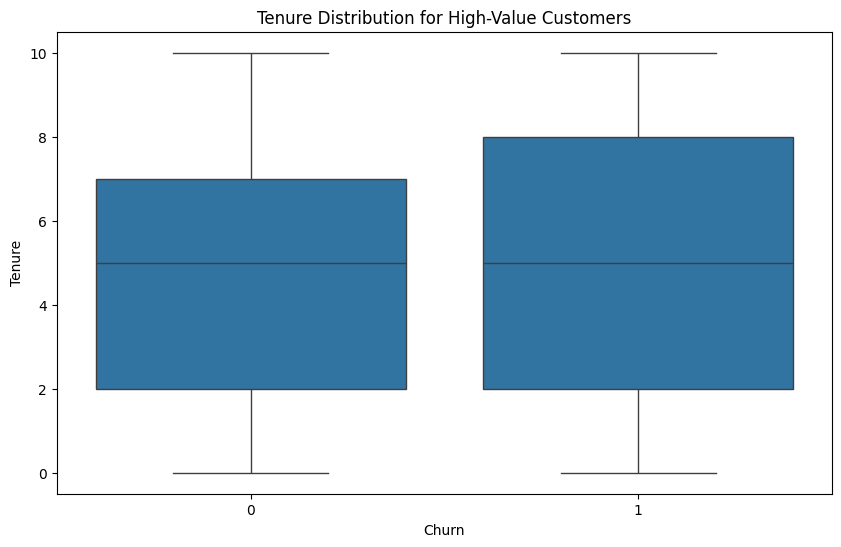

In [ ]:
# Define high-value customers (example: top 25% based on balance)
data['balance_percentile'] = data['balance'].rank(pct=True)
high_value_customers = data[data['balance_percentile'] >= 0.75]

# Analyze churn rate among high-value customers
churn_rate_high_value = high_value_customers['churn'].mean() * 100
print(f"Churn rate for high-value customers: {churn_rate_high_value:.2f}%")

# Visualize age distribution for churned and non-churned high-value customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='age', data=high_value_customers)
plt.title('Age Distribution for High-Value Customers')
plt.xlabel('Churn')
plt.ylabel('Age')
plt.show()

# Analyze churn rate by gender for high-value customers
gender_churn_rate = high_value_customers.groupby('gender')['churn'].mean() * 100
print(gender_churn_rate)

# Analyze churn rate by country for high-value customers
country_churn_rate = high_value_customers.groupby('country')['churn'].mean() * 100
print(country_churn_rate)

# Calculate correlation between credit score and churn for high-value customers
correlation = high_value_customers['credit_score'].corr(high_value_customers['churn'])
print(f"Correlation between credit score and churn for high-value customers: {correlation:.2f}")

# Analyze churn rate by number of products for high-value customers
products_churn_rate = high_value_customers.groupby('products_number')['churn'].mean() * 100
print(products_churn_rate)

# Visualize tenure distribution for churned and non-churned high-value customers
plt.figure(figsize=(10, 6))
sns.boxplot(x='churn', y='tenure', data=high_value_customers)
plt.title('Tenure Distribution for High-Value Customers')
plt.xlabel('Churn')
plt.ylabel('Tenure')
plt.show()

In [ ]:
import pandas as pd
import numpy as np
data1 = pd.read_csv('/content/modified_Bank Customer Churn Prediction222.csv')
data1.head()

,Unnamed: 0,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,...,age_seg_B,age_seg_C,credit_score_seg,balance_seg,tenure_seg,age_group,gender_country,balance_salary_ratio,balance_credit_ratio,age_seg_A
0,0,619,France,Female,42,2,0.00,1,1,1,...,1,0,2,0,0,37-55,Female_France,0.000000,0.000000,0
1,1,608,Spain,Female,41,1,83807.86,1,0,1,...,1,0,2,1,0,37-55,Female_Spain,0.744677,137.841875,0
2,2,502,France,Female,42,8,159660.80,3,1,0,...,1,0,1,3,3,37-55,Female_France,1.401375,318.049402,0
3,3,699,France,Female,39,1,0.00,2,0,0,...,1,0,5,0,0,37-55,Female_France,0.000000,0.000000,0
4,4,850,Spain,Female,43,2,125510.82,1,1,1,...,1,0,6,2,0,37-55,Female_Spain,1.587055,147.659788,0


In [ ]:
data1.drop(['Unnamed: 0'],axis=1,inplace=True)

In [ ]:
data1.describe()

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,gender_num,...,country_Spain,gender_Male,age_seg_B,age_seg_C,credit_score_seg,balance_seg,tenure_seg,balance_salary_ratio,balance_credit_ratio,age_seg_A
count,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,...,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000,9574.000000
mean,650.740547,37.651556,5.015459,76537.282091,1.524859,0.705557,0.502507,100140.948291,0.201379,0.453833,...,0.247023,0.546167,0.478588,0.040422,3.339148,1.428348,1.350324,3.978387,120.238766,0.480990
std,96.055633,8.639293,2.887850,62419.717368,0.559766,0.455816,0.500020,57510.324746,0.401051,0.497890,...,0.431303,0.497890,0.499567,0.196957,2.026715,1.223330,1.194411,110.717263,101.091807,0.499665
min,383.000000,18.000000,0.000000,0.000000,1.000000,0.000000,0.000000,11.580000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.000000,0.000000,51112.885000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97245.995000,1.000000,1.000000,1.000000,100193.915000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,0.745705,144.397107,0.000000
75%,717.000000,43.000000,7.000000,127653.825000,2.000000,1.000000,1.000000,149414.455000,0.000000,1.000000,...,0.000000,1.000000,1.000000,0.000000,5.000000,3.000000,2.000000,1.515623,199.609889,1.000000
max,850.000000,61.000000,10.000000,250898.090000,3.000000,1.000000,1.000000,199992.480000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,6.000000,3.000000,3.000000,10614.655440,453.032311,1.000000
